## HW Exercise & Solution - Batch_Norm for CIFAR10 Dataset
2019/11/18

[ Reference ]
+ Rui Shu, "**TENSORFLOW GUIDE: BATCH NORMALIZATION**", 2016/12/26. http://ruishu.io/2016/12/27/batchnorm/
    + Github code: https://github.com/RuiShu/micro-projects/blob/master/tf-batchnorm/batchnorm_guide.ipynb
+ Federico Peccia, "**Batch normalization: theory and how to use it with Tensorflow**", , Towards Data Science, 2018/09/16. https://towardsdatascience.com/batch-normalization-theory-and-how-to-use-it-with-tensorflow-1892ca0173ad
+ Antoine Labatie, "**It’s Necessary to Combine Batch Norm and Skip Connections**", Towards Data Science, 2019/09/01. https://towardsdatascience.com/its-necessary-to-combine-batch-norm-and-skip-connections-e92210ca04da
+ Andrew Ng (吳恩達教授) "**Batch Norm At Test Time (C2W3L07)**", Youtube.com : https://youtu.be/5qefnAek8OA
+ dhwajraj, "**How I can apply batch normalization?**", 2016/12/07.
https://github.com/dennybritz/cnn-text-classification-tf/issues/29
+ **`tf.contrib.layers.conv2d`** 
https://www.tensorflow.org/api_docs/python/tf/contrib/layers/conv2d
+ Tom Hope, Yehezkel S. Resheff, and Itay Lieder, 
"**Learning TensorFlow A Guide to Building Deep Learning SystemsSystems**", Chapter 4, O'Reilly, 2017. 
[ Code ] : https://github.com/giser-yugang/Learning_TensorFlow

- [< Case Study > : Batch_Norm for Both CNNs & FCDNs](#BNforBoth)
- [< Exercise > : Batch_Norm for CIFAR-10 Dataset](#BNforCIFAR10)

In [1]:
import numpy as np
import tensorflow as tf
print(tf.__version__)
# for the old-version usage of TensorFlow, such as tensorflow.examples.tutorials.mnist
old_v = tf.logging.get_verbosity()          
tf.logging.set_verbosity(tf.logging.ERROR) 

1.15.0


### Download CIFAR-10 Python Version dataset from 
+ #### https://www.cs.toronto.edu/~kriz/cifar.html
+ The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

> #### [ Reference ] :  
> #### `Learning Multiple Layers of Features from Tiny Images`, Alex Krizhevsky, 2009.
https://www.cs.toronto.edu/~kriz/learning-features-2009-TR.pdf

### Loading dataset and running this program on the Google's Colab...

In [2]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

##  Go to this URL in a browser: https://accounts.google.com/o/oauth2/...
##  Enter your authorization code:
##   ··········
##  Mounted at /content/drive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
# !ls "/content/drive/My Drive"
!ls "/content/drive/My Drive/Colab Notebooks/cifar-10-batches-py"

batches.meta  data_batch_2  data_batch_4  readme.html
data_batch_1  data_batch_3  data_batch_5  test_batch


### Input CIFAR-10 dataset 

In [0]:
import pickle
import os

##  Loading CIFAR-10 dataset from your Google Drive
DATA_PATH = "/content/drive/My Drive/Colab Notebooks/cifar-10-batches-py"

##  < for CIFAR-10 dataset on local host >
## DATA_PATH = "./cifar-10-batches-py"

def unpickle(file):
    with open(os.path.join(DATA_PATH, file), 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')   ##  encoding='bytes'
    return dict

def one_hot(vec, vals=10):
    n = len(vec)
    out = np.zeros((n, vals))
    out[range(n), vec] = 1
    return out

In [0]:
import numpy as np

class CifarLoader(object):
    def __init__(self, source_files):
        self._source = source_files
        self._i = 0
        self.images = None
        self.labels = None
    
    def load(self):
        data = [unpickle(f) for f in self._source]
        # print(data)
        images = np.vstack([d[b"data"] for d in data])
        n = len(images)  # 32 x 32 x 3 channels
        self.images = images.reshape(n, 3, 32, 32).transpose(0, 2, 3, 1).astype(float) / 255
        self.labels = one_hot(np.hstack([d[b"labels"] for d in data]), 10)
        return self

    def next_batch(self, batch_size):
        x, y = self.images[self._i : self._i+batch_size], self.labels[self._i:self._i+batch_size]
        self._i = (self._i + batch_size) % len(self.images)
        return x, y

In [0]:
class CifarDataManager(object):
    def __init__(self):
        self.train = CifarLoader(["data_batch_{}".format(i)
                                   for i in range(1, 6)]).load()
        self.test = CifarLoader(["test_batch"]).load()

Number of train images: (50000, 32, 32, 3)
Number of train labels: (50000, 10)
Number of test images: (10000, 32, 32, 3)
Number of test images: (10000, 10)


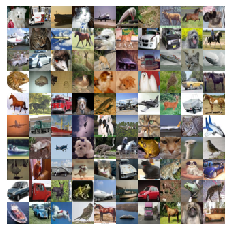

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

def display_cifar(images, size):
    n = len(images)
    plt.figure()
    plt.gca().set_axis_off()
    im = np.vstack([np.hstack([images[np.random.choice(n)] for i in range(size)])
         for i in range(size)])
    plt.imshow(im)
    plt.show()
    
d = CifarDataManager()
print("Number of train images: {}".format(d.train.images.shape))
print("Number of train labels: {}".format(d.train.labels.shape))
print("Number of test images: {}".format(d.test.images.shape))
print("Number of test images: {}".format(d.test.labels.shape))
images = d.train.images
display_cifar(images, 10)

In [8]:
images[0][0]

array([[0.23137255, 0.24313725, 0.24705882],
       [0.16862745, 0.18039216, 0.17647059],
       [0.19607843, 0.18823529, 0.16862745],
       [0.26666667, 0.21176471, 0.16470588],
       [0.38431373, 0.28627451, 0.20392157],
       [0.46666667, 0.35686275, 0.24705882],
       [0.54509804, 0.41960784, 0.29411765],
       [0.56862745, 0.43137255, 0.31372549],
       [0.58431373, 0.45882353, 0.34901961],
       [0.58431373, 0.47058824, 0.36470588],
       [0.51372549, 0.40392157, 0.30196078],
       [0.49019608, 0.38823529, 0.29803922],
       [0.55686275, 0.45098039, 0.35686275],
       [0.56470588, 0.43921569, 0.3372549 ],
       [0.5372549 , 0.41176471, 0.30980392],
       [0.50588235, 0.38039216, 0.27843137],
       [0.5372549 , 0.41568627, 0.30980392],
       [0.5254902 , 0.41568627, 0.29803922],
       [0.48627451, 0.38039216, 0.25098039],
       [0.54509804, 0.44313725, 0.30588235],
       [0.54509804, 0.43921569, 0.29411765],
       [0.52156863, 0.41176471, 0.27058824],
       [0.

--------------------------------------
<a id='BNforCIFAR10'></a>
## < Exercise > : Batch_Norm for Convnets with CIFAR-10 Datasets 

### [ Problem ]: 
> 1. Please modify the Case-Study TensorFlow code above for building a multiple-output classifier with the **CIFAR-10** dataset, which includes "Convolution Layers" & "MaxPooling Layers", as following:
    + **Conv Layer 1**
    + **Conv Layer 2**
    + **Conv Layer 3**
    + **MaxPool Layer**
    + **Conv Layer 1**
    + **Conv Layer 2**
    + **Conv Layer 3**
    + **MaxPool Layer**
    + **Conv Layer 1**
    + **Conv Layer 2**
    + **Conv Layer 3**
    + **MaxPool Layer**
    + **Hidden Layer** 
    + **Hidden Layer** 
    + **Output Layer**
    
> 2. Using Batch Normalization by applying `tf.contrib.layers.batch_norm()` to `tf.contrib.layers.conv2d()`. 

> 3. And then, compare the results with those in the reference below:
    + Tom Hope, Yehezkel S. Resheff, and Itay Lieder, "**`Learning TensorFlow : A Guide to Building Deep Learning Systems`**", Chapter 4, O'Reilly, 2017.
      [ Code ] : https://github.com/giser-yugang/Learning_TensorFlow.

[ REFERENCE ] :
+ dhwajraj, "How I can apply batch normalization?", 2016/12/07. https://github.com/dennybritz/cnn-text-classification-tf/issues/29
+ `tf.contrib.layers.conv2d`:https://www.tensorflow.org/api_docs/python/tf/contrib/layers/conv2d

> conv1 = `tf.contrib.layers.conv2d(...,
                                  normalizer_fn = tf.contrib.layers.batch_norm, 
                                  ...)`

> conv_out = `tf.nn.relu(conv1)`

## < Solution >
 

In [0]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                          strides=[1, 2, 2, 1], padding='SAME')

def conv_layer(input, shape):
    W = weight_variable(shape)
    b = bias_variable([shape[3]])
    return tf.nn.relu(conv2d(input, W) + b)

def full_layer(input, size):
    in_size = int(input.get_shape()[1])
    W = weight_variable([in_size, size])
    b = bias_variable([size])
    return tf.matmul(input, W) + b

In [0]:
def dense(x, size, scope):
    return tf.contrib.layers.fully_connected(x, size, 
                                             activation_fn=None,
                                             scope=scope)

def dense_relu(x, size, scope):
    with tf.variable_scope(scope):
        h1 = dense(x, size, 'dense')
        return tf.nn.relu(h1, 'relu')

In [0]:
def train_test_dropout():
    learningRate = 1e-3
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    with tf.control_dependencies(update_ops):
      train_step = tf.train.AdamOptimizer(learningRate).minimize(loss)
    
    # --------------------------------------
    # Launch the computation graph...
    # --------------------------------------
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())
    
    history = []
    batch_size = 100
    iterep = 500
    epochs = 30

    ##  ------------------------------------------------------------------
    ##  Test datasets (10000, 32, 32, 3) for both
    ##     (1) Validation (5000, 32, 32, 3) & 
    ##     (2) Testing (5000, 32, 32, 3)
    ##
    ##  Split the test procedure into 5 blocks of 1,000 images each. 
    ##  Doing this is important mostly for much larger datasets.    
    ##  ------------------------------------------------------------------
    nblock = 5
    X_test = cifar.test.images[5000:]
    Y_test = cifar.test.labels[5000:]   
    X_test = X_test.reshape(nblock, 1000, 32, 32, 3)
    Y_test = Y_test.reshape(nblock, 1000, 10)

    ##  Validation dataset for cifar : (5000, 32, 32, 3)
    X_val = cifar.test.images[:5000]
    Y_val = cifar.test.labels[:5000]   
    X_val = X_val.reshape(nblock, 1000, 32, 32, 3)
    Y_val = Y_val.reshape(nblock, 1000, 10)

    for i in range(iterep * epochs):
        x_train, y_train = cifar.train.next_batch(batch_size)
        
        sess.run(train_step,
                 feed_dict={'x:0': x_train, 
                            'y:0': y_train, 
                            'phase:0': 1,
                            keep_prob: 0.5})
        if (i + 1) %  iterep == 0:
            epoch = (i + 1)/iterep
            tr = sess.run([loss, accuracy], 
                          feed_dict={'x:0': x_train,
                                     'y:0': y_train,
                                     'phase:0': 1,
                                     keep_prob: 0.5})

            t_loss = np.mean([sess.run(loss,
                                 feed_dict={'x:0': X_val[i], 
                                            'y:0': Y_val[i], 
                                            'phase:0': 0,
                                            keep_prob: 1.0}) 
                                 for i in range(nblock)])
            t_accu = np.mean([sess.run(accuracy,
                                 feed_dict={'x:0': X_val[i], 
                                            'y:0': Y_val[i], 
                                            'phase:0': 0,
                                            keep_prob: 1.0}) 
                                 for i in range(nblock)])
            t = [t_loss, t_accu]

            history += [[epoch] + tr + t]
            #  history += [[epoch] + tr]
            print(history[-1])
            
    print("\n Computing the test accuracy ... ", end = " ")
    
    ##  ------------------------------------------------------------------
    ##  Testing...
    ##  ------------------------------------------------------------------
    test_loss = np.mean([sess.run(loss,
                                  feed_dict={'x:0': X_test[i], 
                                             'y:0': Y_test[i], 
                                             'phase:0': 0,
                                             keep_prob: 1.0}) 
                                  for i in range(nblock)])
    test_accu = np.mean([sess.run(accuracy,
                                  feed_dict={'x:0': X_test[i], 
                                             'y:0': Y_test[i], 
                                             'phase:0': 0,
                                             keep_prob: 1.0}) 
                                  for i in range(nblock)])
    # print("\n [ Accuracy ] : {:.4}%".format(test_acc * 100))
    print(" Done !!! ")
    
    return history, test_accu, test_loss

### < Case > : No batch normalization

In [0]:
# Reset the default graph...
tf.reset_default_graph()

cifar = CifarDataManager()

# -------------------------------
# Build a computation graph...
# -------------------------------
x = tf.placeholder('float32', (None, 32, 32, 3), name='x')
y = tf.placeholder('float32', (None, 10), name='y')
keep_prob = tf.placeholder(tf.float32)
phase = tf.placeholder(tf.bool, name='phase')

# Conv layers with MaxPooling_2x2 layers
conv1_1 = conv_layer(x, shape=[3, 3, 3, 32])
conv1_2 = conv_layer(conv1_1, shape=[3, 3, 32, 32])
conv1_3 = conv_layer(conv1_2, shape=[3, 3, 32, 32])
conv1_pool = max_pool_2x2(conv1_3)  # (16, 16, 32)
# conv1_drop = tf.nn.dropout(conv1_pool, keep_prob=keep_prob)

conv2_1 = conv_layer(conv1_pool, shape=[3, 3, 32, 64])
conv2_2 = conv_layer(conv2_1, shape=[3, 3, 64, 64])
conv2_3 = conv_layer(conv2_2, shape=[3, 3, 64, 64])
conv2_pool = max_pool_2x2(conv2_3)  #  (8, 8, 64)
# conv2_drop = tf.nn.dropout(conv2_pool, keep_prob=keep_prob)

conv3_1 = conv_layer(conv2_pool, shape=[3, 3, 64, 128])
conv3_2 = conv_layer(conv3_1, shape=[3, 3, 128, 128])
conv3_3 = conv_layer(conv3_2, shape=[3, 3, 128, 128])
conv3_pool = max_pool_2x2(conv3_3)  #  (4, 4, 128)
conv3_flat = tf.reshape(conv3_pool, [-1, 4 * 4 * 128])
conv3_drop = tf.nn.dropout(conv3_flat, keep_prob=keep_prob)

# FCDNetwork with 2 hidden layers...
h1 = dense_relu(conv3_drop, 500, 'layer1')
h1_drop = tf.nn.dropout(h1, keep_prob=keep_prob)
h2 = dense_relu(h1_drop, 200, 'layer2')
h2_drop = tf.nn.dropout(h2, keep_prob=keep_prob)
logits = dense(h2_drop, 10, scope='logits')

with tf.name_scope('loss'):
    loss = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=logits))
    
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(y, 1), tf.argmax(logits, 1)), 
            'float32'))

In [14]:
history, test_accu, test_loss = train_test_dropout()

[1.0, 1.869806, 0.38, 1.6728599, 0.3842]
[2.0, 1.5887802, 0.49, 1.3976103, 0.486]
[3.0, 1.3130113, 0.54, 1.2329074, 0.5528]
[4.0, 1.3113108, 0.56, 1.1435078, 0.602]
[5.0, 1.1384394, 0.63, 1.0458411, 0.638]
[6.0, 1.1108271, 0.62, 0.9360197, 0.67559993]
[7.0, 0.87501985, 0.7, 0.9143999, 0.68380004]
[8.0, 0.8765837, 0.64, 0.8649379, 0.69439995]
[9.0, 0.7996492, 0.7, 0.84260195, 0.7018]
[10.0, 0.8293356, 0.73, 0.8083314, 0.72220004]
[11.0, 0.81815225, 0.68, 0.74572444, 0.742]
[12.0, 0.7102583, 0.72, 0.75650513, 0.7408]
[13.0, 0.69464135, 0.73, 0.7469177, 0.7406]
[14.0, 0.714264, 0.7, 0.7629466, 0.73700005]
[15.0, 0.6454579, 0.71, 0.74099004, 0.7552]
[16.0, 0.5041882, 0.79, 0.74199927, 0.7594]
[17.0, 0.5225016, 0.81, 0.7450963, 0.7564]
[18.0, 0.47685936, 0.83, 0.7093822, 0.7678]
[19.0, 0.43233874, 0.86, 0.7575844, 0.7594]
[20.0, 0.40488842, 0.87, 0.7345058, 0.76919997]
[21.0, 0.5293674, 0.81, 0.7438832, 0.7616]
[22.0, 0.64435613, 0.76, 0.74350435, 0.75540006]
[23.0, 0.5417465, 0.81, 0.77490

In [15]:
print(" [ Test  Accuracy ] : {}".format(test_accu) +
      "\n [ Test Loss Score ] : {}".format(test_loss))

 [ Test  Accuracy ] : 0.7738000154495239
 [ Test Loss Score ] : 0.7458569407463074


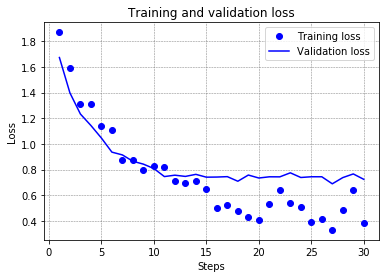

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

steps = np.arange(1, len(history) + 1)

# "bo" is for "blue dot"
plt.plot(steps, [history[i][1] for i in range(len(history))], 
         'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(steps, [history[i][3] for i in range(len(history))], 
         'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Steps')
plt.ylabel('Loss')
step_5 = np.arange(0, len(history) + 1, step=5)
plt.xticks(step_5)
plt.grid(color='grey', linestyle='--', linewidth=0.5)
plt.legend()

plt.show()

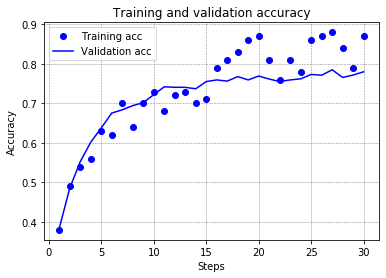

In [17]:
plt.clf()   # clear figure

plt.plot(steps, [history[i][2] for i in range(len(history))], 
         'bo', label='Training acc')
plt.plot(steps, [history[i][4] for i in range(len(history))], 
         'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Steps')
plt.ylabel('Accuracy')
step_5 = np.arange(0, len(history) + 1, step=5)
plt.xticks(step_5)
plt.grid(color='grey', linestyle='--', linewidth=0.5)
plt.legend()

plt.show()

### < Case > : Batch normalization for Both CNNS & FCDNs

In [0]:
def dense_batch_relu(x, phase, scope):
    with tf.variable_scope(scope):
        h1 = tf.contrib.layers.fully_connected(x, 100, activation_fn=None, scope='dense')
        
        # Batch normalization would be to simply use the tf.contrib.layers.batch_norm layer.
        h2 = tf.contrib.layers.batch_norm(h1, 
                                          center=True, scale=True, 
                                          is_training = phase,
                                          scope='bn')
        return tf.nn.relu(h2, 'relu')

In [0]:
def conv2d_bn(x, W, shape):
    # return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')
    return tf.contrib.layers.convolution2d(x, shape[3],
                [shape[0],shape[1]], padding='SAME', 
                normalizer_fn=tf.contrib.layers.batch_norm)

def conv_layer_bn(input, shape):
    W = weight_variable(shape)
    b = bias_variable([shape[3]])
    return tf.nn.relu(conv2d_bn(input, W, shape) + b)

In [0]:
# Reset the default graph...
tf.reset_default_graph()

cifar = CifarDataManager()

# -------------------------------
# Build a computation graph...
# -------------------------------
x = tf.placeholder('float32', (None, 32, 32, 3), name='x')
y = tf.placeholder('float32', (None, 10), name='y')
keep_prob = tf.placeholder(tf.float32)
phase = tf.placeholder(tf.bool, name='phase')

# Conv layers with MaxPooling_2x2 layers
conv1_1 = conv_layer_bn(x, shape=[3, 3, 3, 32])
conv1_2 = conv_layer_bn(conv1_1, shape=[3, 3, 32, 32])
conv1_3 = conv_layer_bn(conv1_2, shape=[3, 3, 32, 32])
conv1_pool = max_pool_2x2(conv1_3)  # (16, 16, 32)
# conv1_drop = tf.nn.dropout(conv1_pool, keep_prob=keep_prob)

conv2_1 = conv_layer_bn(conv1_pool, shape=[3, 3, 32, 64])
conv2_2 = conv_layer_bn(conv2_1, shape=[3, 3, 64, 64])
conv2_3 = conv_layer_bn(conv2_2, shape=[3, 3, 64, 64])
conv2_pool = max_pool_2x2(conv2_3)  #  (8, 8, 64)
# conv2_drop = tf.nn.dropout(conv2_pool, keep_prob=keep_prob)

conv3_1 = conv_layer_bn(conv2_pool, shape=[3, 3, 64, 128])
conv3_2 = conv_layer_bn(conv3_1, shape=[3, 3, 128, 128])
conv3_3 = conv_layer_bn(conv3_2, shape=[3, 3, 128, 128])
conv3_pool = max_pool_2x2(conv3_3)  #  (4, 4, 128)
conv3_flat = tf.reshape(conv3_pool, [-1, 4 * 4 * 128])
conv3_drop = tf.nn.dropout(conv3_flat, keep_prob=keep_prob)

# FCDNetwork with 2 hidden layers...
h1 = dense_batch_relu(conv3_drop, 500, 'layer1')
h1_drop = tf.nn.dropout(h1, keep_prob=keep_prob)
h2 = dense_batch_relu(h1_drop, 200, 'layer2')
h2_drop = tf.nn.dropout(h2, keep_prob=keep_prob)
logits = dense(h2_drop, 10, scope='logits')

with tf.name_scope('loss'):
    loss = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=logits))
    
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(y, 1), tf.argmax(logits, 1)), 
            'float32'))

In [21]:
history_bn, test_accu_bn, test_loss_bn = train_test_dropout()

[1.0, 1.3592616, 0.52, 1.2372051, 0.5528]
[2.0, 1.0690229, 0.62, 0.9085762, 0.6722]
[3.0, 0.8569334, 0.68, 0.7682309, 0.72419995]
[4.0, 0.6879949, 0.73, 0.7030899, 0.75979996]
[5.0, 0.683727, 0.79, 0.62150276, 0.7872]
[6.0, 0.49093202, 0.81, 0.6055162, 0.7984]
[7.0, 0.60501456, 0.77, 0.578655, 0.8134]
[8.0, 0.47161227, 0.86, 0.5730883, 0.8184]
[9.0, 0.4301965, 0.85, 0.56910485, 0.82719994]
[10.0, 0.323272, 0.88, 0.57883006, 0.82439995]
[11.0, 0.29273665, 0.93, 0.57480437, 0.8288]
[12.0, 0.20548533, 0.92, 0.55717754, 0.84239995]
[13.0, 0.27236852, 0.88, 0.5792619, 0.84160006]
[14.0, 0.20671345, 0.93, 0.5855754, 0.84580004]
[15.0, 0.16020447, 0.93, 0.5993757, 0.8436]
[16.0, 0.20505734, 0.92, 0.58898467, 0.84540004]
[17.0, 0.10717023, 0.98, 0.6184238, 0.8484]
[18.0, 0.109602325, 0.96, 0.6481841, 0.84300005]
[19.0, 0.07368303, 0.97, 0.6417224, 0.84499997]
[20.0, 0.24075031, 0.91, 0.68618625, 0.8378]
[21.0, 0.15948617, 0.96, 0.6925318, 0.84239995]
[22.0, 0.10203567, 0.97, 0.73367655, 0.8394

In [22]:
print(" << With Batch Normalization >> :")
print(" [ Test  Accuracy ] : {}".format(test_accu_bn),
      "\n [ Test Loss Score ] : {}".format(test_loss_bn))

print("\n < Without Batch Normalization > :")
print(" [ Test  Accuracy ] : {}".format(test_accu),
      "\n [ Test Loss Score ] : {}".format(test_loss))

 << With Batch Normalization >> :
 [ Test  Accuracy ] : 0.8432000279426575 
 [ Test Loss Score ] : 0.8276705741882324

 < Without Batch Normalization > :
 [ Test  Accuracy ] : 0.7738000154495239 
 [ Test Loss Score ] : 0.7458569407463074


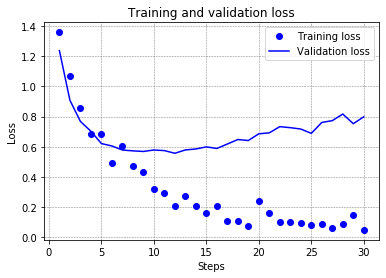

In [23]:
plt.clf()   # clear figure

steps = np.arange(1, len(history) + 1)

# "bo" is for "blue dot"
plt.plot(steps, [history_bn[i][1] for i in range(len(history))], 
         'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(steps, [history_bn[i][3] for i in range(len(history))], 
         'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Steps')
plt.ylabel('Loss')
step_5 = np.arange(0, len(history) + 1, step=5)
plt.xticks(step_5)
plt.grid(color='grey', linestyle='--', linewidth=0.5)
plt.legend()

plt.show()

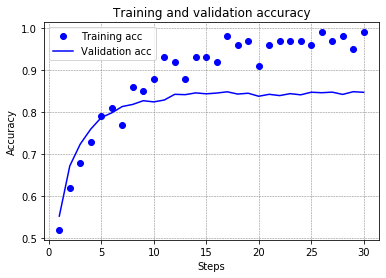

In [24]:
plt.clf()   # clear figure

plt.plot(steps, [history_bn[i][2] for i in range(len(history))], 
         'bo', label='Training acc')
plt.plot(steps, [history_bn[i][4] for i in range(len(history))], 
         'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Steps')
plt.ylabel('Accuracy')
step_5 = np.arange(0, len(history) + 1, step=5)
plt.xticks(step_5)
plt.grid(color='grey', linestyle='--', linewidth=0.5)
plt.legend()

plt.show()

+ ### Evaluation for the Exercise

In [25]:
%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [0]:
history = np.array(history)
history_bn = np.array(history_bn)
# history_post_bn = np.array(history_post_bn)

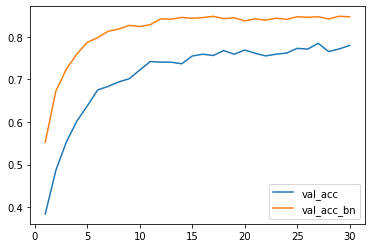

In [27]:
plt.plot(history[:, 0], history[:, -1], label='val_acc')
plt.plot(history_bn[:, 0], history_bn[:, -1], label='val_acc_bn')
# plt.plot(history_post_bn[:, 0], history_post_bn[:, -1], label='val_acc_post_bn')
plt.legend()
plt.show()

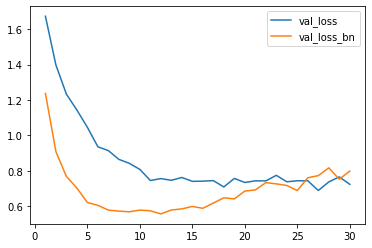

In [28]:
plt.clf()   # clear figure

plt.plot(history[:, 0], history[:, -2], label='val_loss')
plt.plot(history_bn[:, 0], history_bn[:, -2], label='val_loss_bn')
# plt.plot(history_post_bn[:, 0], history_post_bn[:, -2], label='val_loss_post_bn')
plt.legend()
plt.show()

## Q : How to improve the accuracy and reduce the loss? 
([Hint] : Dropouts? Transfer Learning? Inception Modules/Networks? ResNets?)

於final project中比較